# Visualizing Occurences

In [1]:
import numpy as np
import pandas as pd
import plotly as plotly
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.grid_objs import Grid, Column
from plotly.tools import FigureFactory as FF 

import pandas as pd
import time

%matplotlib inline

plotly.tools.set_credentials_file(username='toboa', api_key='ZdyIfyp9N9aHvcmAxnca')

plotly.offline.init_notebook_mode(connected=True) 

In [2]:
#imports the fungi_data
fungi_data = pd.read_csv("march6_mushroom.csv",  delimiter = "\t")

## NOTE: Drops the columns of data that are not useful to us.
fungi_clean = fungi_data.drop(['datasetKey', 'kingdom', 'phylum', 'order','class', 'taxonRank', 
                               'infraspecificEpithet', 'species','rightsHolder', 'license', 'mediaType', 
                               'issue','institutionCode', 'collectionCode','catalogNumber', 'recordNumber',
                               'identifiedBy', 'dateIdentified', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
                               'basisOfRecord',  'elevationAccuracy', 'depth', 'depthAccuracy', 'coordinatePrecision',
                               'elevation', 'countryCode', 'locality', 'eventDate', 'taxonKey','speciesKey', 'recordedBy',
                               'publishingOrgKey', 'gbifID', 'occurrenceID', 'day'], 
                              axis = 1)

fungi_clean = fungi_clean.sort_values('year')
year_num = 1950
# # the years with the most data are 1988 and 1993, with 233 and 244 data points reespectively
data_year = fungi_clean.loc[fungi_clean['year'] == year_num, 'month']
print("This is summary of data from", year_num, ":\n", data_year.describe())

def DataCall(year_num):
    month_sum = np.zeros(13)
    
    data_year = fungi_clean.loc[fungi_clean['year'] == year_num, 'month']
    
    for i in range(1,13):
        month_sum[i-1] = sum(data_year == i)
        total_sum = sum(month_sum)
    normalized_data = (month_sum / total_sum *100)
    return normalized_data, total_sum

This is summary of data from 1950 :
 count     7.000000
mean      9.428571
std       0.786796
min       8.000000
25%       9.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: month, dtype: float64


/Users/louis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
DataCall(1952)

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 14.28571429, 14.28571429, 71.42857143,
         0.        ,  0.        ,  0.        ]), 7.0)

In [4]:
# count max occurence months
import numpy as np
total_month = np.zeros(13)
for j in np.arange(1950,2018,1):
    month_sum,_ = DataCall(j)
    temporary_high = 0
    temporary_month = 0
    for i in range(1,13):
        if month_sum[i] > temporary_high:
            temporary_month = i
            temporary_high = month_sum[i]
    total_month[temporary_month] += 1

print(total_month[1:13])




/Users/louis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning:

invalid value encountered in true_divide



[ 0.  0.  0.  0.  1.  0. 15. 45.  5.  0.  0.  0.]


### Fig 1

<function matplotlib.pyplot.show(*args, **kw)>

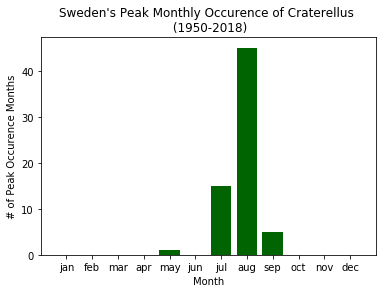

In [5]:
month_names = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = "Sweden's Peak Monthly Occurence of Craterellus \n (1950-2018)", 
       ylabel = "# of Peak Occurence Months",
       xlabel = "Month")
ax.bar(month_names, total_month[1:13], width = .8, color= 'darkgreen')
plt.savefig("peak_occurence_3_14.png", dpi=300)
plt.show